In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

## 1. Load Dataset

In [3]:
retail = pd.read_csv("C:\\Users\\hp\\Desktop\\Online retail1.csv", header=None)
retail

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
retail.shape

(7501, 20)

## 2. Data Preprocessing

In [7]:
transaction = []
for i in range(0, retail.shape[0]):
    for j in range(0, retail.shape[1]):
        transaction.append(retail.values[i,j])
transaction = np.array(transaction)
transaction

array(['shrimp', 'almonds', 'avocado', ..., 'nan', 'nan', 'nan'],
      dtype='<U32')

In [9]:
df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1 

In [11]:
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

In [13]:
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

#Initial Visualizations
df_table.style.background_gradient(cmap='Blues')

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [7]:
transaction = []
for i in range(retail.shape[0]):
    transaction.append([str(retail.values[i,j]) for j in range(retail.shape[1])])
    
transaction = np.array(transaction)
transaction

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [9]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
first100 = df_table["items"].head(100).values # Select Top50
dataset = dataset.loc[:,first100] # Extract Top100 to avoid nan columns
dataset

C:\Users\hp\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\hp\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\hp\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\hp\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'df_table' is not defined

In [21]:
def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = dataset.applymap(encode_units)
dataset.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_2856\2471154488.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(encode_units)


,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,spinach,gluten free bar,pet food,sparkling water,soda,mayonnaise,chili,pickles,burger sauce,mint green tea
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dataset.describe()

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,spinach,gluten free bar,pet food,sparkling water,soda,mayonnaise,chili,pickles,burger sauce,mint green tea
count,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,...,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000
mean,0.238368,0.179709,0.174110,0.170911,0.163845,0.132116,0.129583,0.098254,0.095321,0.095054,...,0.007066,0.006932,0.006532,0.006266,0.006266,0.006133,0.006133,0.005999,0.005866,0.005599
std,0.426114,0.383971,0.379229,0.376456,0.370159,0.338639,0.335866,0.297677,0.293677,0.293309,...,0.083766,0.082978,0.080565,0.078914,0.078914,0.078075,0.078075,0.077227,0.076369,0.074623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Association rule mining

In [25]:
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\hp\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.238368,(mineral water),1
1,0.179709,(eggs),1
2,0.174110,(spaghetti),1
3,0.170911,(french fries),1
4,0.163845,(chocolate),1
...,...,...,...
252,0.010932,"(chocolate, ground beef, mineral water)",3
253,0.011065,"(ground beef, mineral water, milk)",3
254,0.011065,"(frozen vegetables, mineral water, milk)",3
255,0.010532,"(spaghetti, eggs, chocolate)",3


In [27]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
102,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
103,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094
157,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788
160,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602
178,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,0.660314
...,...,...,...,...,...,...,...,...,...,...
133,(eggs),"(mineral water, milk)",0.179709,0.047994,0.013065,0.072700,1.514791,0.004440,1.026644,0.414296
55,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823,0.389677
54,(chocolate),(milk),0.163845,0.129583,0.032129,0.196094,1.513276,0.010898,1.082736,0.405645
63,(champagne),(chocolate),0.046794,0.163845,0.011598,0.247863,1.512793,0.003932,1.111706,0.355611


In [29]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
136,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
193,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
186,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837
199,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555
12,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
...,...,...,...,...,...,...,...,...,...,...
191,(mineral water),"(ground beef, chocolate)",0.238368,0.023064,0.010932,0.045861,1.988472,0.005434,1.023893,0.652679
179,(mineral water),"(spaghetti, olive oil)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,0.613868
18,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,0.528512
139,(mineral water),"(ground beef, eggs)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507,0.695266


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


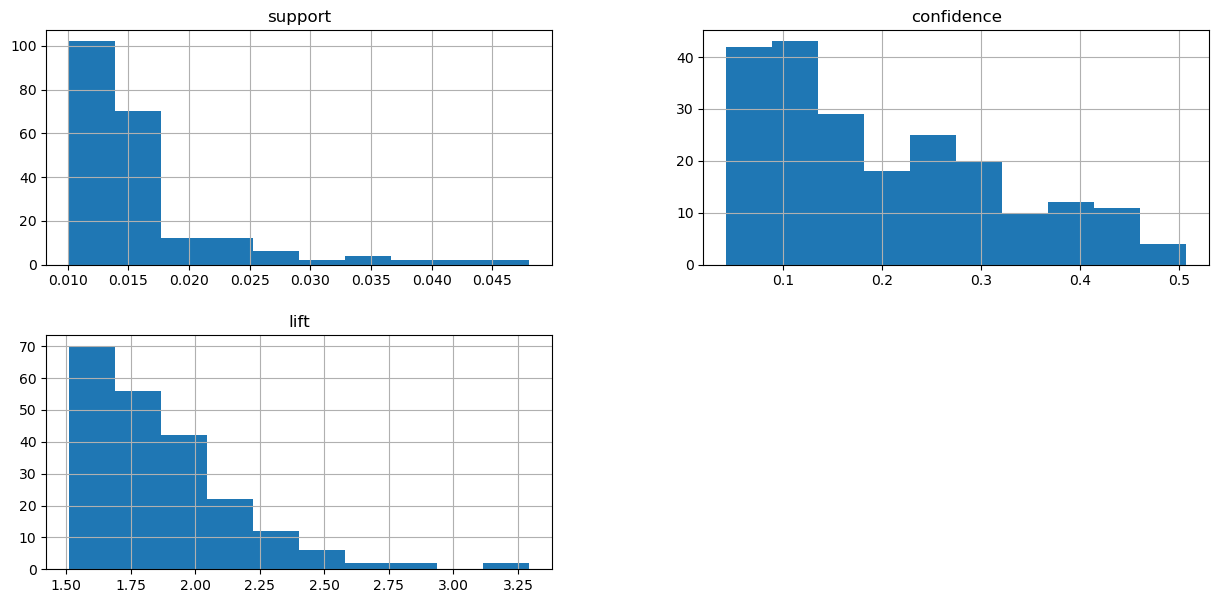

In [31]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

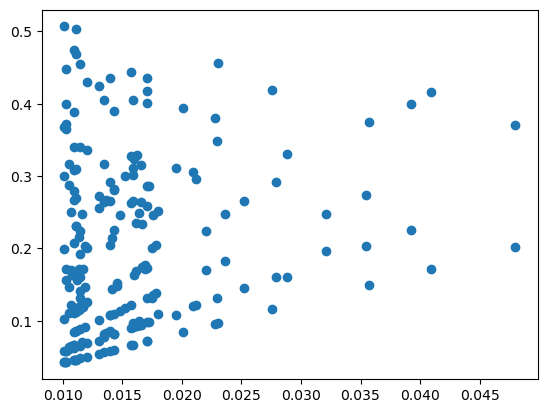

In [33]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

## 4. Analysis and Interpretation

Based on the above rule table, there is a 50% chance that the customers who purchased the ground beef and eggs will also purchase the mineral water. Scores for lift and conviction also corroborate that theory. 
To boost sales, it would be preferable to retain them nearby. 

Since mineral water is the most requested product in the dataset, it primarily dominates the association results. For this reason, it's preferable to construct a confidence table without the mineral water in order to obtain further insights.

In [39]:
rules[~rules["consequents"].str.contains("mineral water", regex=False) & 
      ~rules["antecedents"].str.contains("mineral water", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
53,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,0.538028
36,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
210,"(milk, chocolate)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,0.504495
20,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
49,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543,0.495018
103,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
205,"(eggs, chocolate)",(spaghetti),0.033196,0.174110,0.010532,0.317269,1.822232,0.004752,1.209686,0.466715
51,(salmon),(spaghetti),0.042528,0.174110,0.013465,0.316614,1.818472,0.006060,1.208527,0.470079
43,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1.812196,0.007409,1.206597,0.472963


We can conclude that there is a substantial correlation between red wine and spaghetti and ground beef and spaghetti based on the above data that excludes mineral water. Conviction and lift scores also confirm that.

I've noticed that in both the mineral water included and excluded tables, ground beef is at the top. Because of this, let's investigate linkages where ground beef is used in order to find new associations linked to it and increase sales.

In [41]:
rules[rules["antecedents"].str.contains("ground beef", regex=False) & rules["antecedents"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
136,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
192,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
187,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837
157,"(spaghetti, ground beef)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,0.007722,1.348914,0.470957
158,"(ground beef, mineral water)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,0.009938,1.416470,0.607262
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
27,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
193,"(ground beef, mineral water)",(milk),0.040928,0.129583,0.011065,0.270358,2.086376,0.005762,1.192938,0.542921
186,"(ground beef, mineral water)",(chocolate),0.040928,0.163845,0.010932,0.267101,1.630207,0.004226,1.140887,0.403078
68,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,0.467090


There are many associations with high confidence and lift scores in this table, we can go on with this rule.

If we look into some examples like ground beef and mineral water combination, ground beef and spaghetti, red wine, and spaghetti, and burgers and eggs there are high confidence also high lift scores, and conviction score are there. So, we can conclude that we put these products in the same place to increase the sales.

## 5. Interview Questions

##### 1. What is lift and why is it important in Association rules?

By comparing the observed frequency of the itemset to what would be predicted if the items were independent of one another, lift quantifies the significance of an association rule. Stated differently, it evaluates the degree to which the items are more likely to occur together than randomly.

1. Lift > 1: This indicates that items A and B are more likely to occur together than if they were independent. The higher the lift, the stronger the association.
2. Lift = 1: This suggests that items A and B are independent of each other; their co-occurrence is what you would expect by chance.
3. Lift < 1: This implies that items A and B are less likely to occur together than would be expected by chance, indicating a negative association.

#### Importance:

1. Relevance: Lift helps in identifying truly significant relationships by measuring how much more frequently the items co-occur than random chance would predict.
2. Filtering: It helps in filtering out rules that might be statistically significant but not practically useful. Rules with low or no lift are less interesting because they might not offer actionable insights.
3. Decision Making: High lift values indicate strong, meaningful relationships, which can be used for strategic decisions, marketing strategies, or other business insights.

##### 2. What is support and Confidence? How do you calculate them?

##### Support:

Support measures how frequently an itemset appears in the dataset. It indicates the importance or popularity of an itemset and helps in identifying rules that are applicable to a significant portion of the data.

##### Calculation:

The support of an item (or a rule) is calculated as:

Support= Total number of transactions of X/ Total number of transaction

##### Confidence

Confidence measures the likelihood that item B is purchased when item A is purchased. It reflects the reliability of the rule.

##### Calculation:

The confidence of an item is calculated as:

Confidence= Total number of transactions where A and B present/Total number of transaction where A is present

Together, these two metrics are used to evaluate the validity of association rules: confidence gauges how well the rule predicts the occurrence of one item based on the existence of another, and support verifies that the rule is based on a sizable amount of the data.

##### 3. What are some limitations or challenges of Association rules mining?

Association rules mining is a powerful tool for uncovering relationships in data, but it does come with several limitations and challenges. 

1. Scalability: It can be computationally intensive with large datasets.
2. High dimensionality: Datasets with many attributes can lead to a combinatorial explosion of potential itemsets, making it difficult to generate and evaluate all possible rules.
3. Rule interpretation: The rules generated can be difficult to interpret and analyze
4. Data sparsity: In many real-world datasets, the data may be sparse, with many items appearing infrequently. This can lead to rules based on limited data, which may not be reliable.
5. Overfitting: There is a risk of overfitting.
6. Quality of data: The effectiveness of association rule mining depends on the quality of the data.
7. Bias and Fairness: The rules discovered might reflect biases present in the data, potentially leading to unfair or biased outcomes.